In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
###  Import Data
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [22]:
# dimensi pada DataFrame
print(f"Dimemsi Pada DataFrame : {df.shape}")

Dimemsi Pada DataFrame : (30, 3)


In [23]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [24]:
# Check Data Duplicated
print(f"Check data Dupliacted Pada DataFrame : {df.duplicated().sum()}")

Check data Dupliacted Pada DataFrame : 0


In [25]:
# Check Data Kosong
print(f"Check data Kosong Pada DataFrame : \n{df.isnull().sum()}")

Check data Kosong Pada DataFrame : 
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [26]:
# Check Nilai unik pada DataFrame
for i in df.columns:
    print({i : df[i].unique()})

{'Unnamed: 0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)}
{'YearsExperience': array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.8,  4. ,  4.1,
        4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,  8. ,  8.3,
        8.8,  9.1,  9.6,  9.7, 10.4, 10.6])}
{'Salary': array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])}


In [27]:
### Menghapus kolom
df = df.drop(columns=['Unnamed: 0'])

In [28]:
# Deskripsi Dasta
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


<Axes: >

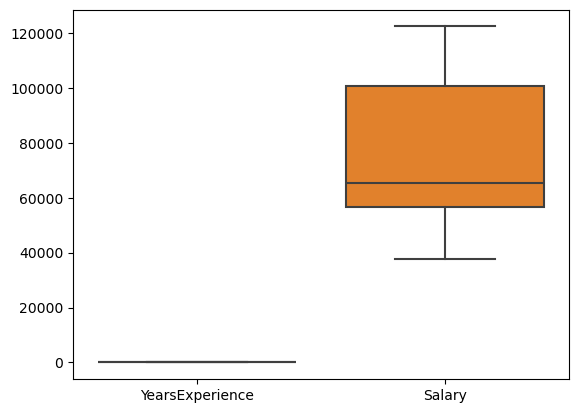

In [29]:
# Visualisasi kolom
sns.boxplot(df)

<Axes: >

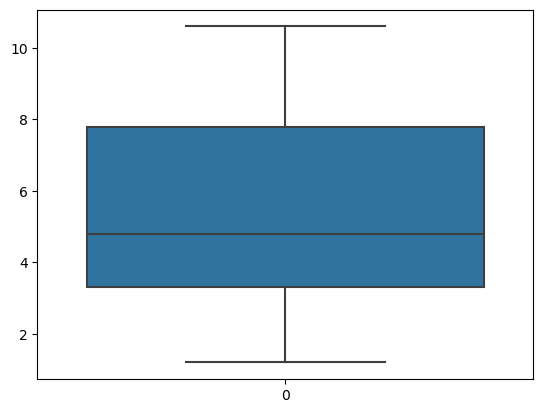

In [30]:
# Check Data pada Kolom YearsExperience
sns.boxplot(df['YearsExperience'])

### Visualisasi hubungan kolom

<Axes: >

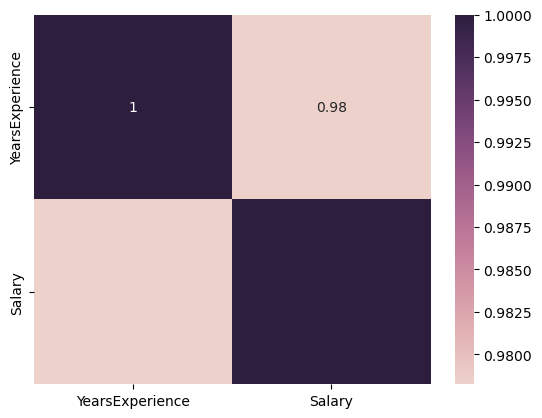

In [31]:
sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

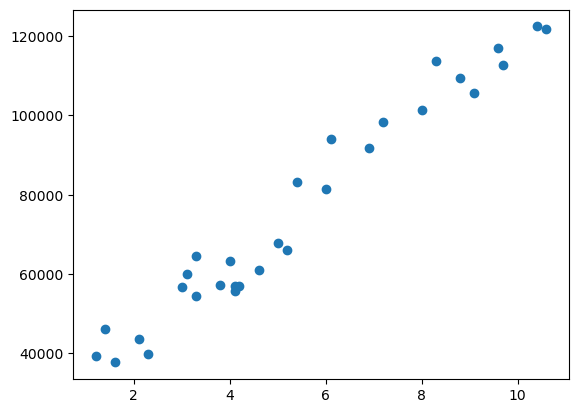

In [32]:
plt.scatter(x='YearsExperience', y ='Salary', data=df)

### Pemodelan Data

* memilih fitur dan target
* indek kolom din mulai dari 0

In [67]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

In [68]:
### Split Data Traing and testing
np.random.seed(42)
train_size = int(len(x) * 0.8)
idx = np.random.permutation(len(x))

x_train, x_test, y_train, y_test = x.iloc[idx[:train_size]], x.iloc[idx[train_size:]], y.iloc[idx[:train_size]], y.iloc[idx[train_size:]]

In [69]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(24,)
(24,)
(6,)
(6,)


In [70]:
### Menghitug slope and intercept
slope = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / (len(x) * np.sum(x**2) - np.sum(x)**2)

intercept = (np.sum(y) - slope * np.sum(x)) / len(x)

In [71]:
slope

9449.96232145509

In [72]:
intercept

24848.203966523117

In [73]:
# Memprediksi
y_pred = round(intercept + slope * x_test)

In [79]:
### Evaluasi model
## R-squared ada;ah mengukur sebarapa baik model 
### Nilai nya berkisar 1 dan 0 ,
# Dimana 0 menunjukan mdel tidak dapat menjelaskan variasi data sama sekali
## sedangkan 1 menunjuka model mampu menjelaskan seluruh data dengan sempurna
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
print(f"Hasil Evaluasi model : {r2}")

Hasil Evaluasi model : 0.8507650906078916


In [83]:
### MSE mean squared error
mse = np.mean((y_test - y_pred)**2)
print(f"Mean Squared Error : {mse}")

Mean Squared Error : 37461068.333333336


In [81]:
### MAE mean Absulote error
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absulote error : {mae}")

Mean Absulote error : 4751.0


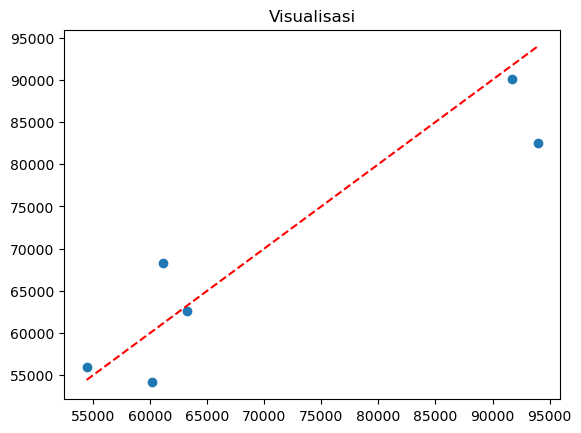

In [82]:
# Visualisai
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Visualisasi")
plt.show()